## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [139]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [140]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**There are 294478 rows in the Dataset.**

c. The number of unique users in the dataset.

In [142]:
df.user_id.nunique()


290584

**The number of unique users is: 290584**

d. The proportion of users converted.

In [143]:
converted = df.query('converted == 1').user_id.nunique()
print(converted)

not_converted = df.query('converted == 0').user_id.nunique()
print(not_converted)
print('\n sum: ', converted + not_converted)

35173
256275

 sum:  291448


**The Proportion of Users that converted is : <b>12.1%</b>: $<=>\frac{\mbox{# of unique users that converted}}{\mbox{number of unique users}}$ <br><br>
The Proportion of Users that did not convert is : <b>88.2%</b>: $<=>\frac{\mbox{# of unique users that did not convert}}{\mbox{number of unique users}}$**

e. The number of times the `new_page` and `treatment` don't line up.

In [144]:
# In each row a value of "control" for the group should match a value of "old_page" 
# for the landing page, a value of "treatment" for the group, should match a value of 
# "new_page", for the page. Lets verify if we have mismatching items:

df_inconsistent = df.query('group == "treatment" and landing_page == "old_page"')
print(df_inconsistent.shape)
print(df_inconsistent.head(10))

df_incons2 = df.query('group == "control" and landing_page == "new_page"')
print(df_incons2.shape)
print(df_incons2.head(10))


(1965, 5)
      user_id                   timestamp      group landing_page  converted
308    857184  2017-01-20 07:34:59.832626  treatment     old_page          0
327    686623  2017-01-09 14:26:40.734775  treatment     old_page          0
357    856078  2017-01-12 12:29:30.354835  treatment     old_page          0
685    666385  2017-01-23 08:11:54.823806  treatment     old_page          0
713    748761  2017-01-10 15:47:44.445196  treatment     old_page          0
776    820951  2017-01-04 02:42:54.770627  treatment     old_page          0
889    839954  2017-01-06 20:58:22.280929  treatment     old_page          0
1037   880442  2017-01-07 21:42:39.026815  treatment     old_page          0
1106   817911  2017-01-17 21:51:43.220160  treatment     old_page          0
1376   844475  2017-01-20 14:25:37.359614  treatment     old_page          0
(1928, 5)
      user_id                   timestamp    group landing_page  converted
22     767017  2017-01-12 22:58:14.991443  control     new

**There are 1965 records where "treatment" and "new_page" do <i>NOT</i> match and 1928 rows where "control" and "old_page" do <i>NOT</i> match.**

f. Do any of the rows have missing values?

In [145]:
sum(df.isnull().sum(axis=1))

0

**There aren't any missing values in the dataset**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

**We should delete the Rows that we are not able to interpret correctly.<br>
To do so, I will drop the rows (from their index) with mismatching values, that I kept in two dataframes in the Question 1.e)**

In [278]:
df_consistent = df.drop(df_inconsistent.index) # dropping mismatching "treatment"/"old_page"
print(df_consistent.shape)

df2 = df_consistent.drop(df_incons2.index)# dropping mismatching "control"/"new_page" 
df2.reset_index(drop=True, inplace=True) # reset the index for consistency.
print(df2.shape)
df2.head()

(292513, 5)
(290585, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [279]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**In another way, I can check again for mismatching values in the rows. I should obtain none:**

In [148]:
df2.query('group == "treatment" and landing_page == "old_page"').shape[0]

0

In [149]:
df2.query('group == "control" and landing_page == "new_page"').shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [150]:
df2.shape

(290585, 5)

In [151]:
df2.user_id.nunique()

290584

**There are 290584 unique users and one user appearing twice in df2**

b. There is one **user_id** repeated in **df2**.  What is it?

In [280]:
Ser = df2.duplicated('user_id')
Ser.value_counts()


False    290584
True          1
dtype: int64

In [281]:
records_per_user = df2.user_id.value_counts()
which_user = records_per_user[records_per_user >1]
which_user


773192    2
Name: user_id, dtype: int64

**The user apppearing in two rows has the user_id: 773192**

c. What is the row information for the repeat **user_id**? 

In [282]:
# We select the rows for the user_id appearing twice is the rows
mask_twice = df2.user_id.isin(records_per_user[records_per_user == 2].index)
# for the mask we could have used as well 'records_per_user >1'

df_twice = df2[mask_twice]
df_twice.head()

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [283]:
#or, since we know exactly the user_id, we can select it directly:
df_repeated = df2.query('user_id == 773192')
df_repeated.head()

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [284]:
the_index = df_repeated.index
print(the_index)
df2.drop(the_index[0], inplace=True)
print(df2.shape[0]) # verify we have one row less

Int64Index([1876, 2862], dtype='int64')
290584


In [286]:
#reset the index for consistency
df2.reset_index(drop=True, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [190]:
p_new = df2.query('converted ==1').shape[0]/df2.shape[0]
p_new
p_old = p_new
p_old

0.11959708724499628

**P(converted) = 0.1196**

In [161]:
df2.query('landing_page == "new_page"').shape[0]

145310

In [162]:
df2.query('landing_page == "old_page"').shape[0]

145274

b. Given that an individual was in the `control` group, what is the probability they converted?

In [159]:
P_convOld = df2.query('landing_page == "old_page"')['converted'].mean()
P_convOld

0.1203863045004612

**P(converted/control group) = 0.1204**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [288]:
P_convNew = df2.query('landing_page == "new_page"')['converted'].mean()
P_convNew

0.11880806551510564

**P(converted/treatment group) = 0.1188**

d. What is the probability that an individual received the new page?

In [166]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

**P(new_page) = P(treatment) = 0.5001**

In [289]:
df2.shape
df2.info()
type(df2.timestamp[0])
print(df2.timestamp[:2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB
0    2017-01-21 22:11:48.556739
1    2017-01-12 08:01:45.159739
Name: timestamp, dtype: object


In [290]:
#cast timestamp from string to timestamp object!
df2.timestamp = pd.to_datetime(df2.timestamp)
df2.timestamp.describe()
df2.sort_values(by=['timestamp'], inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df2.head(3))
print(df2.tail(3))

   user_id                  timestamp      group landing_page  converted
0   922696 2017-01-02 13:42:05.378582  treatment     new_page          0
1   781507 2017-01-02 13:42:15.234051    control     old_page          0
2   737319 2017-01-02 13:42:21.786186    control     old_page          0
        user_id                  timestamp      group landing_page  converted
290581   843121 2017-01-24 13:41:44.097174  treatment     new_page          0
290582   836373 2017-01-24 13:41:52.604673    control     old_page          0
290583   920411 2017-01-24 13:41:54.460509    control     old_page          0


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is no evidence that the treatment would lead to more conversions, in fact the Probability that the users converted with the old page is even higher from our sample. We should conduct an Hypothesis test to find out Evidence of statistical Significance.**  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0 : P_{new} \leq P_{old} <=> P_{new} - P_{old} \leq 0 \mbox{, for the null Hypothesis}$<br>
$H_1 : P_{new} > P_{old} <=> P_{new} - P_{old} > 0 \mbox{, for the alternative Hypothesis}$<br><br>For a significance level: $\alpha = 0.05$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

**$P_{new} = 0.1196 \mbox{, from my previous Result in Part I/ Question 4. a)}$**

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

$P_{old} = P_{new} = 0.1196$

c. What is $n_{new}$?

$n_{new}$ corresponds to the number of rows in our sample, where the landing page is the new page<br>(or the group is the "treatment" group):

In [182]:
df2_experiment = df2.query('group == "treatment"')
n_new = df2_experiment.shape[0] 
print(n_new)
df2_experiment_unique = df2.query('group == "treatment"').user_id.nunique()
df2_experiment_unique

145310


145310

So $n_{new} = 145310$

d. What is $n_{old}$?

$n_{old}$ corresponds to the number of rows in our sample, where the landing page is the old page<br>(or the group is the "control" group) :


In [183]:
df2_control = df2.query('group == "control"')
n_old = df2_control.shape[0]
print(n_old)

145274


So $n_{old} = 145274$

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [291]:
p_new #recall our value computed previously

0.11959708724499628

**We can simulate $n_{new}$ transactions with the binomial Distribution function, giving us a value of 0 or 1, with a success probability of $p_{new}$, this repeated $n_{new}$ times:**

In [218]:
# We simulate the n_new transactions with the binomial Distribution function:
new_page_converted = np.random.binomial(1, p_new, n_new)
print(len(new_page_converted))
new_page_converted[0]

145310


0

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

**Like before, we use the binomial Function, with 1 outcome, at a success probability of $p_{old}$, repeated $n_{old}$ times:**

In [220]:
old_page_converted = np.random.binomial(1, p_old, n_old)
print(len(old_page_converted))
old_page_converted[0]

145274


0

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [221]:
p_new_simulated = new_page_converted.mean()
p_new_simulated

0.12018443328057257

In [222]:
p_old_simulated = old_page_converted.mean()
p_old_simulated

0.11982185387612374

In [232]:
p_diff_simulated = p_new_simulated - p_old_simulated
p_diff_simulated

0.0003625794044488373

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

**This time, we use first the binomial Function giving us an $n_{new}$ binary outcome, with a Probability $P_{new}$ of success, repeated 10000 times.<br>
Dividing each outcome by $n_{new}$, provides us with 10 000 values of $P_{new}$:**

In [225]:
new_samp10000 = np.random.binomial(n_new, p_new, 10000)
print(len(new_samp10000))
print(new_samp10000[0])
p_new10000 = new_samp10000/n_new

p_new10000[:5]

10000
17317


array([0.1191728 , 0.11992981, 0.12084509, 0.11794784, 0.11961324])

**We now use the binomial Function giving us an $n_{old}$ binary outcome, with a Probability $P_{old}$ of success, repeated 10000 times.<br>
Dividing each outcome by $n_{old}$, provides us with 10 000 values of $P_{old}$:**

In [226]:
old_samp10000 = np.random.binomial(n_old, p_old, 10000)
print(len(old_samp10000))
print(old_samp10000[0])
p_old10000 = old_samp10000/n_old
p_old10000[:5]

10000
17270


array([0.11887881, 0.11922299, 0.11942261, 0.11887192, 0.11922299])

**We finally obtain a simulated Distribution for the Proportions Difference, in substracting the two previously obtained numpy arrays:<br>We then obtain 10000 values of $P_{new} - P_{old}$:**

In [229]:
pdiffs = p_new10000 - p_old10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**We should obtain a simulated sampling Distribution of the proportions difference under the null, so centered on $p_{new} - p_{old} = 0$. The distribution should look normally distributed.**

In [292]:
p_diff_observed = P_convNew - P_convOld
p_diff_observed

-0.0015782389853555567

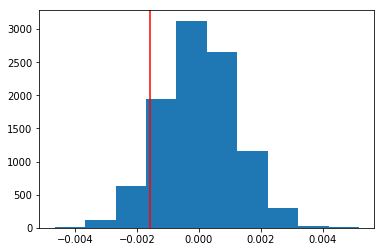

In [293]:
plt.hist(pdiffs)

plt.axvline(p_diff_observed, color='red')

**The histogram looks like I expected. I added the location of the observed proportion difference from the sample on the x axis.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [236]:
(pdiffs > p_diff_observed).mean()

0.9092

**The $p_{value}$ of our statistic is $0.9092$**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The Distribution we plotted is the simulated Sampling Distribution 'under the null', i.e. assuming that the null Hypothesis is true. We can see, where our observed statistics $P_{new} - P_{old}$, falls on this Distribution.
We then compute the corresponding p-value, which is the conditional Probabiblity of our statistic, given that "the Null is true". With a type I error rate of 5%, such as $\alpha = 0.05$, we see that our p_value (0.91) is so much bigger, than $\alpha$, which means we fail to reject the Null.
So our $H_0$ is true : the Proportion of Users in the Control Group that converted is higher or equal to the Proportion of Users in the Experiment/Treatment Group that converted.<br>
Based on these Results, the Company should not launch the new Page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [240]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
print(convert_old)
print(convert_new)
print(n_old) # n_old and n_new were calculated in the Question 2 c) and d)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [242]:
#According to the useful linked Resource:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)

1.3109241984234394 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We just made a built-in, two tailed test to see if there is a stastically significance in the difference of our Proportions $P_{new} \mbox{ and }P_{old}$ at a significance level $\alpha = 0.05$. 
The corresponding critical values are 
$\pm1.96$.<br>As our z_score $(=1.311)$ is not, either greater than $+1.96$, nor less than $-1.96$, we fail to reject the Null. In this case it means there is no stastically significant Difference in our Proportions. So like our previous Founding, it means that the rates of Users that "converted" for the new and old Pages, are not different.<br>So the company should <i>NOT</i> launch the new Page.
<br>The <i>p_value</i> is the probability that our Statistic, the Z_score, randomly comes from the Null Distribution.It is likely (at 19%) that this is the case. So it also means that we "fail to reject the Null".** 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since our Response Variable, "converted", which we are interested in predicting is categorical, taking only two outcome Values: 1 and 0, we should perform a <i> logistic Regression.</i>**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [246]:
df2['intercept'] = 1
# Now we generate dummy variables and just add
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1
1,781507,2017-01-02 13:42:15.234051,control,old_page,0,1
2,737319,2017-01-02 13:42:21.786186,control,old_page,0,1
3,818377,2017-01-02 13:42:26.640581,treatment,new_page,0,1
4,725857,2017-01-02 13:42:27.851110,treatment,new_page,0,1


In [248]:
df_dummy = pd.get_dummies(df2['group'])
df_dummy.head()

,control,treatment
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [249]:
df2['ab_page'] = df_dummy['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1,1
1,781507,2017-01-02 13:42:15.234051,control,old_page,0,1,0
2,737319,2017-01-02 13:42:21.786186,control,old_page,0,1,0
3,818377,2017-01-02 13:42:26.640581,treatment,new_page,0,1,1
4,725857,2017-01-02 13:42:27.851110,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [252]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [253]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:59:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The $p_{value}$ we found for <i>ab_page</i> is $0.19$. This is not the same as the first $p_{value}$ of $0.91$ we computed in Part II, but is the same as the $p_{value}$ we found with the built-in Method (in Part II Question 2. l) and m))!<br>
The Reason is, that <i>here</i>, -as well as with the built-in - but <i>unlike</i> the first set of Hypotheses we had chosen (Part II  Question 2) a) until k) ), we conducted a <i>two-tailed test</i>, with a set of Hypotheses being:<br>
$H_0: P_{new} = P_{old}$<br>$H_1: P_{new} != P_{old}$</align><br>
Our first Set of Hypotheses was not just testing the statistically Significance of a <i>Difference</i> of the Proportions, but testing if one was <i>bigger</i> than the other, with a one-tailed test:<br>
$H_0: P_{new}\leq P_{old}$<br>
$H_1: P_{new}>P_{old}$<br><br>
This $p_{value} > \alpha$, so like the results we had before, it does <i>NOT</i> suggest a statistical Significance of the Differences in the conversion Rates, for the new and old pages!**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The more we add explanatory variables that are correlated with the Response, the better our model will fit and predict the Response. However, the explanatory variables might also be correlated with each other, which could bring "flipped" results, in contradiction with what we would expect in a "bivariate" model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [254]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [257]:
print(df_new.country.value_counts())
print(df_new.shape)
print(df2.shape)
df_new.head()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64
(290584, 7)
(290584, 7)


,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [261]:
### Create the necessary dummy variables
df_country_columns = pd.get_dummies(df_new['country'])
df_country_columns.head()
df_new[['CA', 'UK', 'US']] = df_country_columns
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [266]:
# we add the categorical country dummy variables, with CA as the base line, ensuring our Matrice
# is "full rank"
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Feb 2019   Pseudo R-squ.:               2.323e-05
Time:                        13:10:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Results Interpretation:<br>It does not appear that the Countries the Users come from, are significantly correlated with the Response, as the corresponding $p_{values}$ are all greater than $\alpha = 0.05$.** 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there are significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

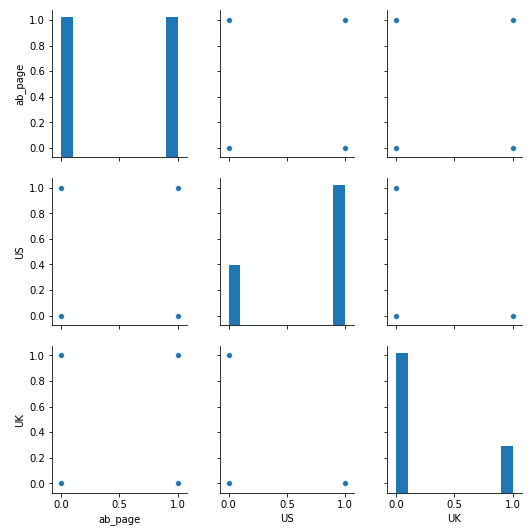

In [270]:
# First I would like to try and visualize a possible Correlation between the Country Variables 
# and the new/old pages Variables with a scatterplot:

import seaborn as sb

sb.pairplot(df_new[['ab_page', 'US', 'UK']]);

**I cannot visualize any possible Correlation since the variables are all categorical.**

**I will add an interaction term to my model between the new/old page and the countries of UK and US. To do so, I need to compute the new columns with the product of my two variables:**

In [269]:
### Fit Your Linear Model And Obtain the Results
df_new['page_uk']=df_new['ab_page']*df_new['UK']
df_new['page_us']=df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page_uk,page_us
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


**I only kept one interaction in my Model, between the country of UK and the ab_page, since adding a second interaction between US country and ab_page, did not provide any better results.**

In [277]:
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'page_uk']])
results = log_mod3.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Feb 2019   Pseudo R-squ.:               2.036e-05
Time:                        14:07:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
page_uk        0.0345      0.026      1.307      0.191      -0.017       0.086
==============================================================================
"""

**Results Interpretation:<br>Based on the results found for the $p_{values}$, we don't find any Evidence of significant Correlation between the country variables , here 'UK' and the page tested, having an effect on the Conversion Rate**.

<a id='conclusions'></a>
## Conclusions

**The 3 different Approaches to our A/B Test with Probabilities, A/B test with Hypothesis testing and logistic Regression Model gave us the same Response: We did not find statistical Significance in the Difference of Proportions and based on our Results we could not state that the conversion rate for the new Page, is either better nor different, than the conversion rate for the old Page. Based on our results, we can say that the Company should <i>not</i> launch the new page.**

**Limitation Section:<br>A possible Limitation of our tests could be the relative short amount of time (about three weeks), within which the A/B test was conducted. A possible "change aversion" effect might bias the results.**


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.